In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
heart_dataset = pd.read_csv('./heart.csv')
heart_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 9.1 A Brief matplotlib API Primer

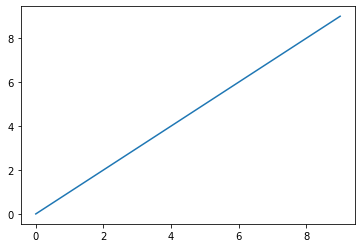

In [4]:
data = np.arange(10)
plt.plot(data)

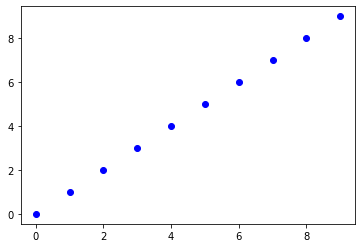

In [5]:
plt.plot(data,'bo')

## Figures and Subplots.

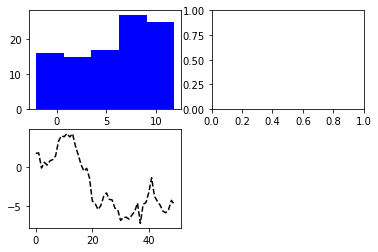

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100).cumsum(),bins=5,color='b')
plt.plot(np.random.randn(50).cumsum(), 'k--')

Line plots can additionally have markers to highlight the actual data points. Since
matplotlib creates a continuous line plot, interpolating between points, it can occa‐
sionally be unclear where the points lie. The marker can be part of the style string,
which must have color followed by marker type and line style.

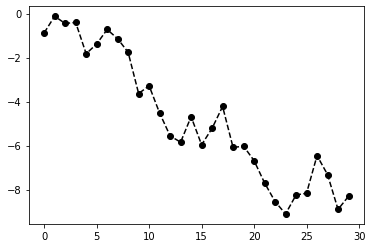

In [7]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

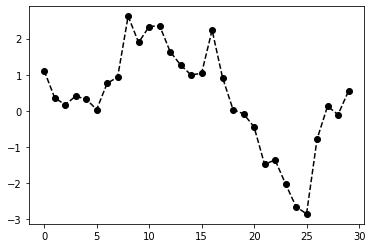

In [8]:
# This could also have been written more explicitly as:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

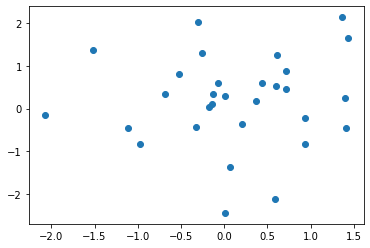

In [9]:
plt.scatter(np.random.randn(30).astype(np.float32),np.random.randn(30).astype(np.float32))

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

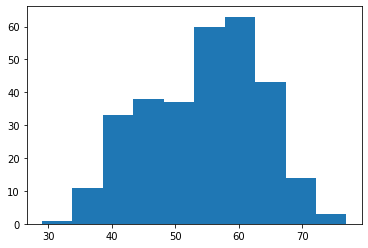

In [10]:
plt.hist(heart_dataset['age'])

(array([ 96., 207.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

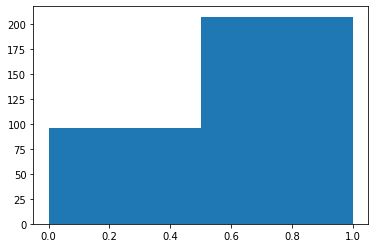

In [11]:
plt.hist(heart_dataset['sex'],bins=2)

In [12]:
len(heart_dataset['sex'])

303

In [13]:
heart_dataset['sex'].count

<bound method Series.count of 0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64>

(array([143.,   0.,   0.,  50.,   0.,   0.,  87.,   0.,   0.,  23.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

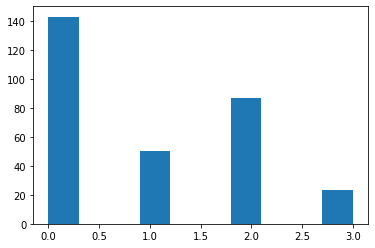

In [14]:
plt.hist(heart_dataset['cp'])

(array([138., 165.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

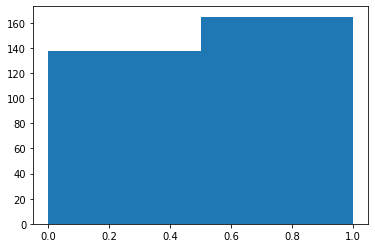

In [15]:
plt.hist(heart_dataset['target'], bins=2)

In [16]:
100 // 7

14

In [17]:
100 / 7

14.285714285714286

In [37]:
males_dataset = heart_dataset['sex'][heart_dataset['sex'] == True]
males_dataset

0      1
1      1
3      1
5      1
7      1
      ..
295    1
297    1
299    1
300    1
301    1
Name: sex, Length: 207, dtype: int64

In [38]:
females_dataset = heart_dataset['sex'][heart_dataset['sex'] == False]
females_dataset

2      0
4      0
6      0
11     0
14     0
      ..
289    0
292    0
296    0
298    0
302    0
Name: sex, Length: 96, dtype: int64

In [39]:
male_dataset = heart_dataset['sex'] == True
male_dataset

0       True
1       True
2      False
3       True
4      False
       ...  
298    False
299     True
300     True
301     True
302    False
Name: sex, Length: 303, dtype: bool

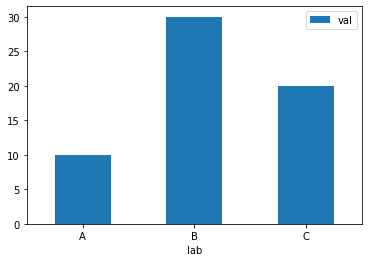

In [55]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='lab', y='val', rot=0)
ax

(array([  0.,   0.,   0.,   0.,   0., 207.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

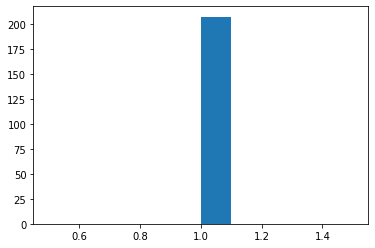

In [66]:
plt.hist(males_dataset.values)

(array([ 0.,  0.,  0.,  0.,  0., 96.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

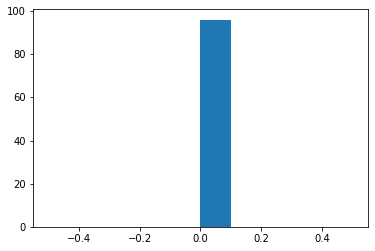

In [67]:
plt.hist(females_dataset.values)